In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
url="https://www.dropbox.com/scl/fi/aqwfkgz2n7sbib4u37d4z/ipl_auction_large_named_corrected_dataset.csv?rlkey=66k1mk4ov54x4jdv1f1r7iqv4&st=jqlo2smq&dl=1"
df=pd.read_csv(url)
print(df.head())
print(df.tail())
df.columns=df.columns.str.lower()
df.rename(columns={'final price (₹ cr)':'final_price_cr','base price (₹ cr)':'base_price_cr'},inplace=True)
print(df.columns)
print(df.info())

      Player Name    Role Team  Base Price (₹ Cr)  Final Price (₹ Cr)  \
0     Trent Boult  Bowler   DC               1.23               10.64   
1    David Warner  Batter  LSG               1.26                7.20   
2     Rashid Khan  Bowler   MI               1.70                3.97   
3   Deepak Chahar  Bowler   RR               2.30                8.86   
4  Sandeep Sharma  Bowler  LSG               1.74               10.91   

   Matches Played  Runs Scored  Wickets Taken  Strike Rate  Economy Rate  Age  \
0              76            0            137          NaN           9.3   40   
1             265         5179              0        117.7           NaN   28   
2             250          390             88          NaN           8.5   36   
3              90         6248              0        117.8           NaN   24   
4             182          603            109        152.7           8.2   32   

        Country  Year Captain (Yes/No)  
0  South Africa  2024            

In [26]:
df['strike rate']=df['strike rate'].fillna(0)
df['economy rate']=df['economy rate'].fillna(0)


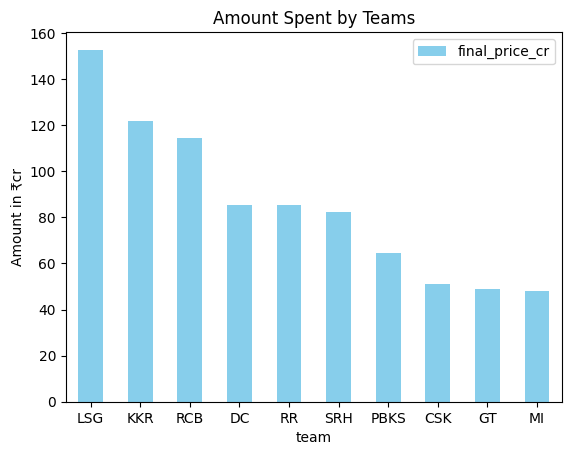

✅LSG has Spent the maximum amount in this auction which is upto 152.70cr
✅Surprisingly CSK has spent the least amount in this auction which is upto 48.08cr


In [27]:
data=df.groupby('team')[['final_price_cr']].sum().sort_values('final_price_cr',ascending=False)
data.plot(kind='bar',color='skyblue')
plt.title('Amount Spent by Teams')
plt.ylabel('Amount in ₹cr')
plt.xticks(rotation=360)
plt.show()
print('✅LSG has Spent the maximum amount in this auction which is upto 152.70cr')
print('✅Surprisingly CSK has spent the least amount in this auction which is upto 48.08cr')

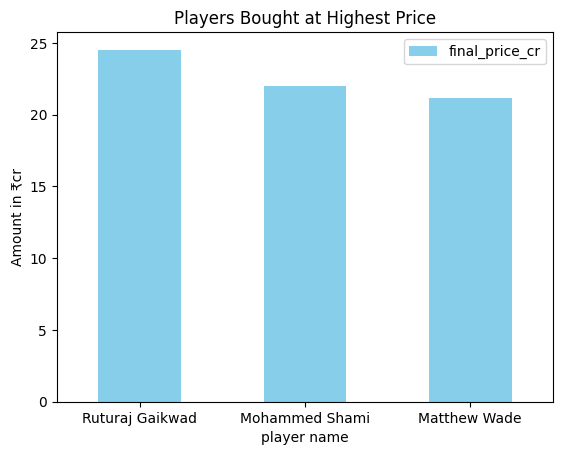

✅Ruturaj Gaikwad has become the most expensive buy for CSK which is 24.52cr


In [28]:
data=df[df['final_price_cr']>=20.0].groupby('player name')[['final_price_cr']].sum().sort_values('final_price_cr',ascending=False)
data.plot(kind='bar',color='skyblue')
plt.title('Players Bought at Highest Price')
plt.ylabel("Amount in ₹cr")
plt.xticks(rotation=360)
plt.show();

print('✅Ruturaj Gaikwad has become the most expensive buy for CSK which is 24.52cr')

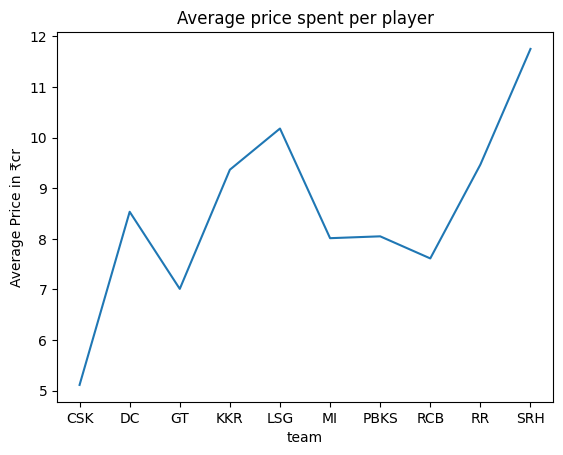

✅SRH spent highest amount i.e, 11.75cr
✅CSK spent lowest amount i.e, 5.1cr


In [29]:
data=df.groupby('team')['final_price_cr'].sum()/df.groupby('team')['player name'].count()
data.plot()
plt.ylabel('Average Price in ₹cr')
plt.title('Average price spent per player')
plt.xticks(range(len(data.index)),data.index)
plt.show();
print('✅SRH spent highest amount i.e, 11.75cr')
print('✅CSK spent lowest amount i.e, 5.1cr')

✅CSK,DC,GT,RCB has purchased some very valuable assests in low price well done


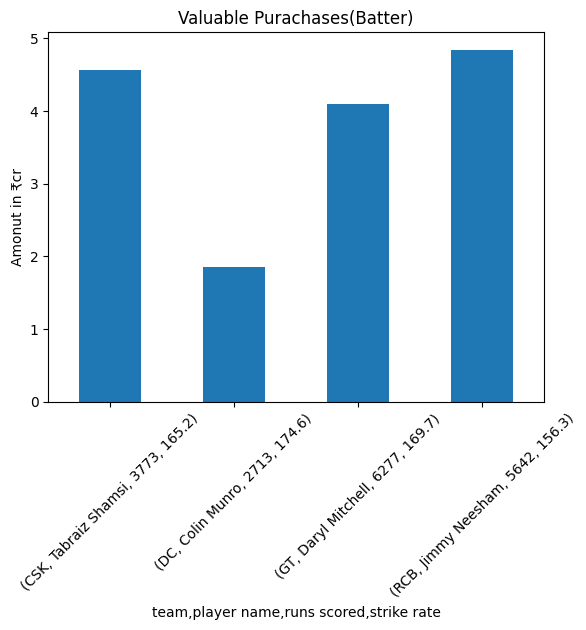

In [30]:
data=df[(df['strike rate']>150) & (df['runs scored']>1000) & (df['final_price_cr']<=5.0)].groupby(['team','player name','runs scored','strike rate'],as_index=True)[['final_price_cr']].sum()
data['final_price_cr'].plot(kind='bar')
plt.xticks(rotation=45)
plt.title('Valuable Purachases(Batter)')
plt.ylabel('Amonut in ₹cr')
print('✅CSK,DC,GT,RCB has purchased some very valuable assests in low price well done')

✅CSK, GT, MI has bought most valuable players in less price


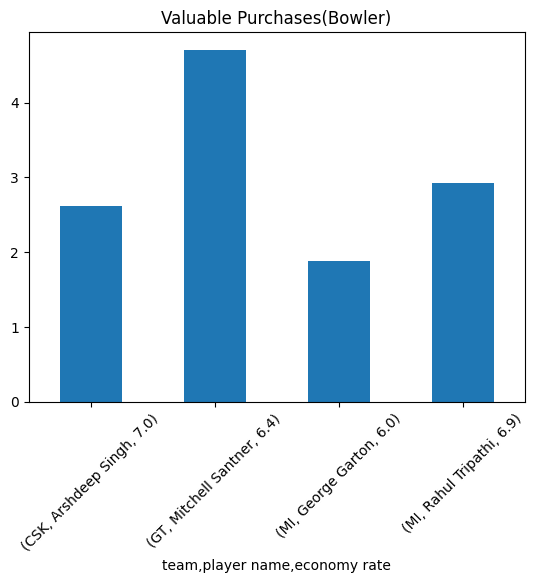

In [31]:
data=df[(df['economy rate']<=7)&(df['economy rate']>0)&(df['wickets taken']>=25) &(df['final_price_cr']<=5.0)].groupby(['team','player name','economy rate'],as_index=True)[['final_price_cr']].sum()
data['final_price_cr'].plot(kind='bar')
plt.xticks(rotation=45)
plt.title('Valuable Purchases(Bowler)')
print('✅CSK, GT, MI has bought most valuable players in less price')

✅GT, LSG, RR, SRH has spent much money on under


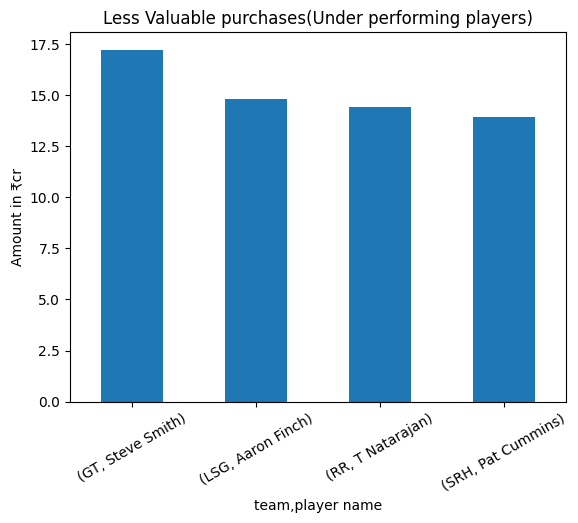

In [32]:
data=df[(df['runs scored']<1000) & (df['strike rate']<130) &(df['role']=='Batter')&(df['final_price_cr']>=10.0) | (df['wickets taken']<20) & (df['role']=='Bowler') & (df['economy rate']>9) & (df['final_price_cr']>=10)].groupby(['team','player name',])[['final_price_cr']].sum()
data['final_price_cr'].plot(kind='bar')
plt.title('Less Valuable purchases(Under performing players)')
plt.xticks(rotation=30)
plt.ylabel('Amount in ₹cr')
print('✅GT, LSG, RR, SRH has spent much money on under')

✅West Indies players have received the highest bids💰 in this Auction
✅England players have received the lowest bids💰in this Auction
This Auction Teams seems to spent their money on Experinced players than Young Talents


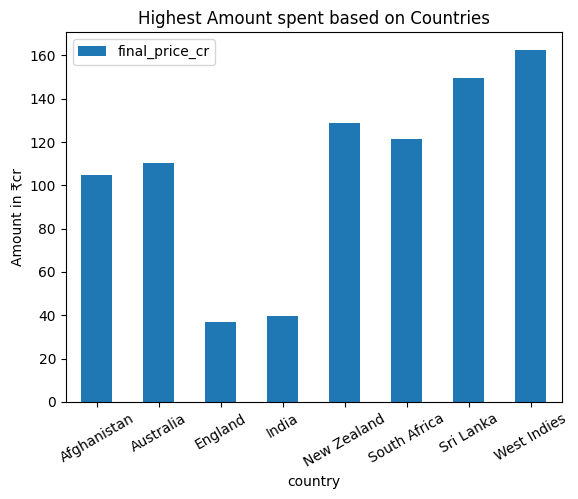

In [33]:
data=df.groupby('country')[['final_price_cr']].sum()
data.plot(kind='bar')
plt.title('Highest Amount spent based on Countries')
plt.ylabel('Amount in ₹cr')
plt.xticks(rotation=30)
data_old=df[df['age']>=30][['player name']].count()
data_new=df[df['age']<=25][['player name']].count()
print('✅West Indies players have received the highest bids💰 in this Auction')
print('✅England players have received the lowest bids💰in this Auction')
print('This Auction Teams seems to spent their money on Experinced players than Young Talents')